In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [111]:
#read table, just choose the one you want by writing its path

csv=pd.read_csv("singleInvs/tableGenOptions.table.csv", header=[1,2], sep="\t", index_col=0)
csv = csv.drop(['Unnamed: 1_level_0', 'Unnamed: 2_level_0'], axis='columns', level=0)

csv

run set                                            eval_kInd1               \
../../precision-reuse-files/programs/                  Status CPU Time (s)   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...    TIMEOUT   901.128995   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...    TIMEOUT   901.222885   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...       true     7.318037   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...    TIMEOUT   901.319119   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...    TIMEOUT   902.610402   
...                                                       ...          ...   
drivers--tty--serial--uartlite.ko/drivers--tty-...       true    48.510860   
drivers--tty--serial--uartlite.ko/drivers--tty-...       true    47.502901   
drivers--tty--serial--uartlite.ko/drivers--tty-...       true    48.276295   
drivers--tty--serial--uartlite.ko/drivers--tty-...       true    50.274232   
drivers--tty--serial--uartlite.ko/drivers--tty-...       true    38.399016   

run set                                                           \
../../precision-reuse-files/programs/              Wall Time (s)   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...    825.299385   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...    842.503832   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...      3.794164   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...    824.849798   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...    803.222833   
...                                                          ...   
drivers--tty--serial--uartlite.ko/drivers--tty-...     24.519662   
drivers--tty--serial--uartlite.ko/drivers--tty-...     23.980831   
drivers--tty--serial--uartlite.ko/drivers--tty-...     24.403696   
drivers--tty--serial--uartlite.ko/drivers--tty-...     25.400775   
drivers--tty--serial--uartlite.ko/drivers--tty-...     19.412089   

run set                                                           \
../../precision-reuse-files/programs/                Memory (MB)   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...   9985.945600   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...  10473.521152   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...    152.145920   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...  10202.279936   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...   9911.820288   
...                                                          ...   
drivers--tty--serial--uartlite.ko/drivers--tty-...    770.134016   
drivers--tty--serial--uartlite.ko/drivers--tty-...    919.216128   
drivers--tty--serial--uartlite.ko/drivers--tty-...    638.115840   
drivers--tty--serial--uartlite.ko/drivers--tty-...    843.735040   
drivers--tty--serial--uartlite.ko/drivers--tty-...    951.988224   

run set                                                              \
../../precision-reuse-files/programs/              Adapt Pred. Time   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...              NaN   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...              NaN   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...              NaN   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...              NaN   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...              NaN   
...                                                             ...   
drivers--tty--serial--uartlite.ko/drivers--tty-...              NaN   
drivers--tty--serial--uartlite.ko/drivers--tty-...              NaN   
drivers--tty--serial--uartlite.ko/drivers--tty-...              NaN   
drivers--tty--serial--uartlite.ko/drivers--tty-...              NaN   
drivers--tty--serial--uartlite.ko/drivers--tty-...              NaN   

run set                                                                  \
../../precision-reuse-files/programs/              # invariants Bound k   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...          NaN     NaN   
drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc-...          NaN   

In [112]:
#Change column names for better readability, drop runs with error, change ordering

csv = csv.stack(0)
csv.columns.name=""
csv.index.names = ['driver', 'run set']
csv=csv.reset_index()

csv = csv.drop(csv[csv["Status"] == "TIMEOUT"].index)
csv = csv.drop(csv[csv["Status"] == "EXCEPTION"].index)
csv = csv.drop(csv[csv["Status"] == "OUT OF MEMORY"].index)
csv = csv.drop(csv[csv["Status"] == "TIMEOUT (true)"].index)
csv = csv.drop(csv[csv["Status"] == "TIMEOUT (EXCEPTION)"].index)

csv = csv.rename(columns={"# invariants":"Number of Invariants",
                          "Adapt Pred. Time (ms)":"Predicate to Invariant Conversion Time (ms)",
                          "BMC formula creation (s)":"BMC Formula Creation (s)",
                          "Bound k":"Bound K",
                          "Max. loop iteration":"Maximal Loop Iteration",
                          "bounding assertions check (s)":"Bounding Assertions Check (s)",
                          "final sat check (s)":"Final Sat Check (s)",
                          "induction check (s)":"Induction Check (s)",
                          "induction formula check (s)":"Induction Formula Check (s)"})
csv = csv.rename(columns={"cputime (s)":"CPU Time (s)", "memory (MB)":"Memory (MB)", "walltime (s)": "Walltime (s)"})

csv

,driver,run set,Number of Invariants,Adapt Pred. Time,Predicate to Invariant Conversion Time (ms),BMC Formula Creation (s),Bound K,CPU Time (s),Maximal Loop Iteration,Memory (MB),Status,Wall Time (s),Bounding Assertions Check (s),Final Sat Check (s),Induction Check (s),Induction Formula Check (s)
1,drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc...,eval_kIndRe_all,14.0,NaN,26.0,1.456,1.0,54.014690,2.0,918.589440,true,33.334053,2.514,3.516,4.450,16.274
2,drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc...,eval_kIndRe_all_l,14.0,NaN,16.0,1.310,1.0,42.730257,2.0,926.724096,true,26.370525,2.000,2.751,3.444,12.725
6,drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc...,eval_kIndRe_gf,14.0,NaN,20.0,1.409,1.0,44.357798,2.0,907.845632,true,27.181393,2.051,2.843,3.790,12.662
7,drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc...,eval_kIndRe_gl,14.0,NaN,14.0,1.158,1.0,41.470119,2.0,893.984768,true,25.681424,1.919,2.576,3.439,12.514
8,drivers--rtc--rtc-pcf2123.ko/drivers--rtc--rtc...,eval_kIndRe_gl_l,14.0,NaN,29.0,1.381,1.0,46.251178,2.0,936.980480,true,28.314924,2.119,2.787,3.939,13.852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45151,drivers--tty--serial--uartlite.ko/drivers--tty...,eval_kIndRe_gl,56.0,NaN,22.0,1.654,1.0,40.093788,2.0,738.082816,true,20.226873,NaN,13.498,NaN,NaN
45152,drivers--tty--serial--uartlite.ko/drivers--tty...,eval_kIndRe_gl_l,56.0,NaN,24.0,1.959,1.0,44.037576,2.0,828.030976,true,22.209407,NaN,14.697,NaN,NaN
45153,drivers--tty--serial--uartlite.ko/drivers--tty...,eval_kIndRe_global,56.0,NaN,28.0,1.835,1.0,51.148575,2.0,654.819328,true,25.788819,NaN,17.385,NaN,NaN
45154,drivers--tty--serial--uartlite.ko/drivers--tty...,eval_kIndRe_local,0.0,NaN,16.0,2.033,1.0,48.248782,2.0,846.102528,true,24.340412,3.205,0.000,NaN,NaN


In [113]:
#change set names for better readability, maybe change to whatever fits

csv['run set'] = csv['run set'].str.replace('eval_kInd1', 'stand-alone')
csv['run set'] = csv['run set'].str.replace('eval_kIndRe_', '')
csv['run set'] = csv['run set'].str.replace('eval_kIndRe4_global', 'kIndRe')
csv['run set'] = csv['run set'].str.replace('eval_', '')
csv['run set'] = csv['run set'].str.replace('4', '')

Number of Invariants
Adapt Pred. Time
Predicate to Invariant Conversion Time (ms)
BMC Formula Creation (s)
Bound K
CPU Time (s)
Maximal Loop Iteration
Memory (MB)
Wall Time (s)
Bounding Assertions Check (s)
Final Sat Check (s)
Induction Check (s)
Induction Formula Check (s)


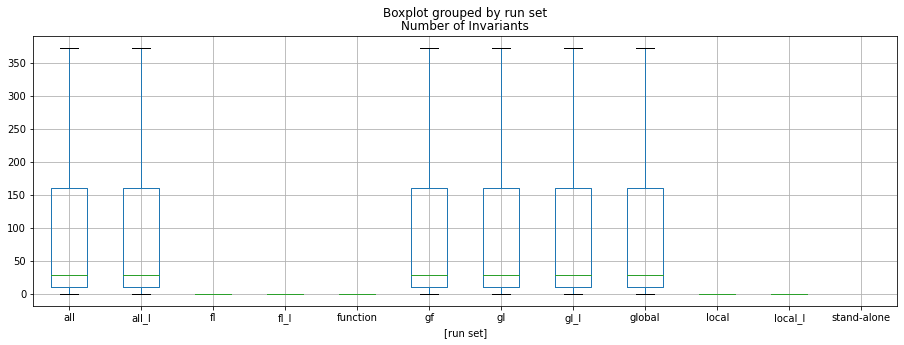

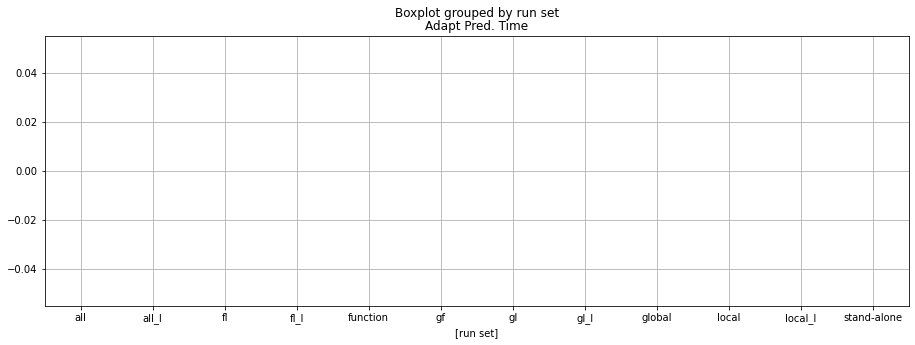

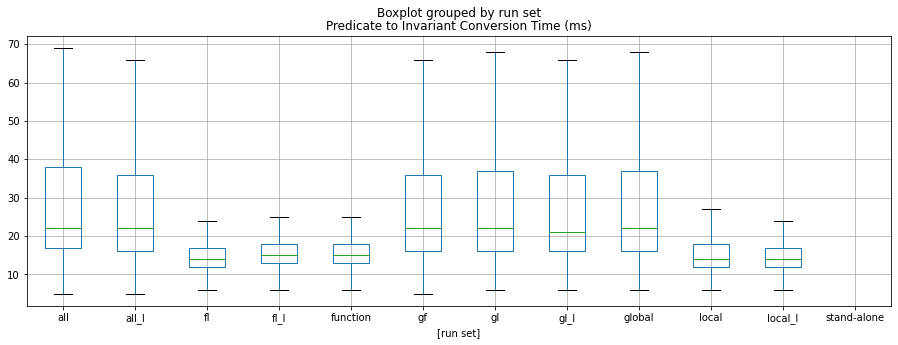

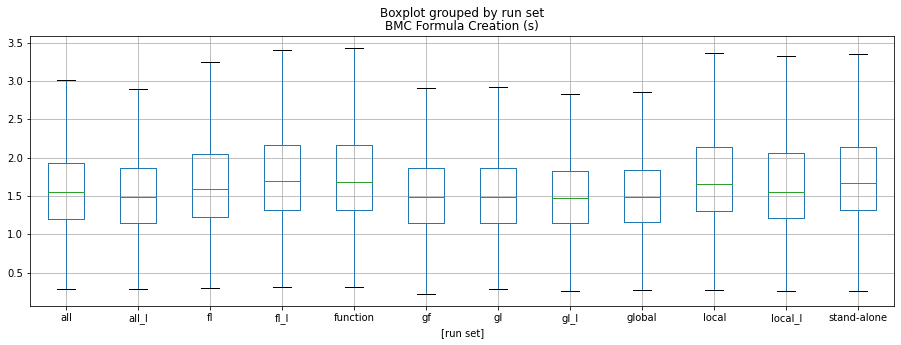

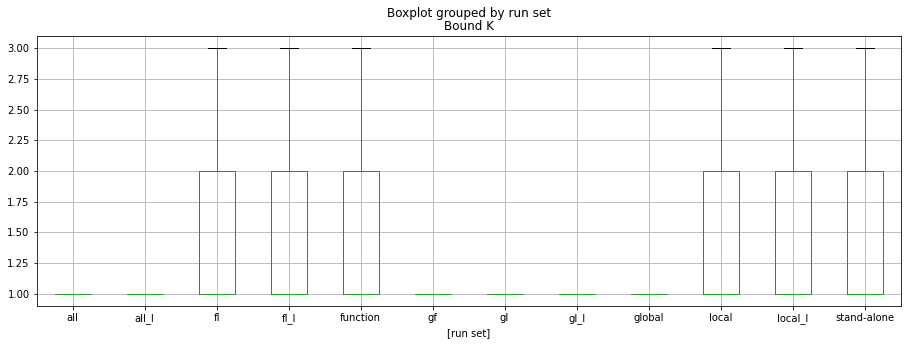

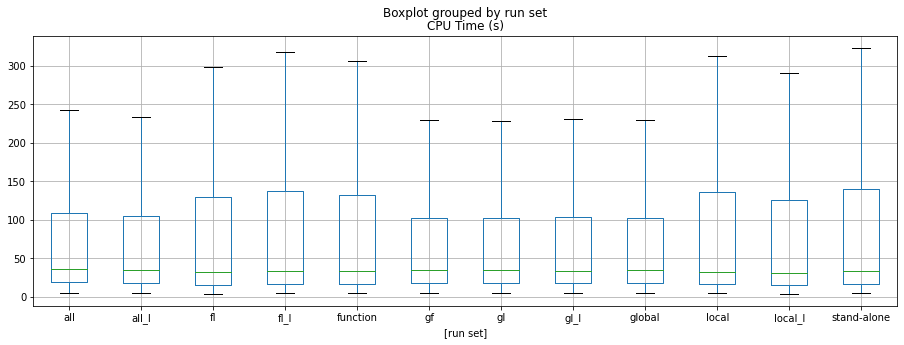

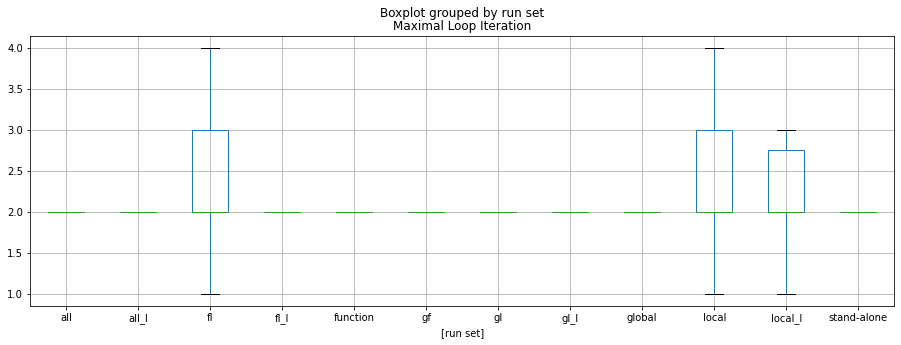

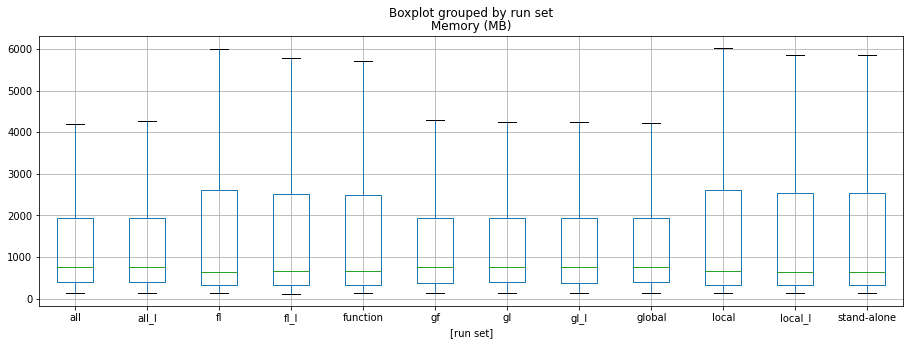

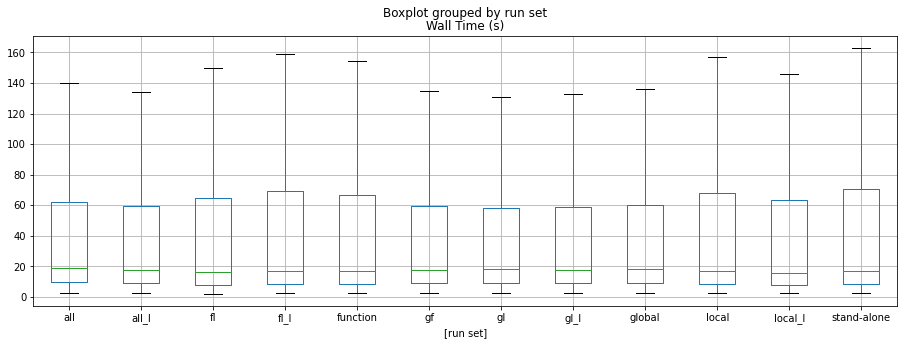

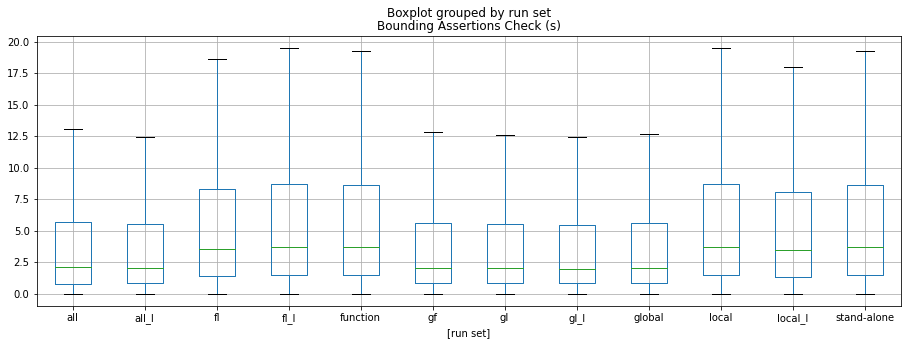

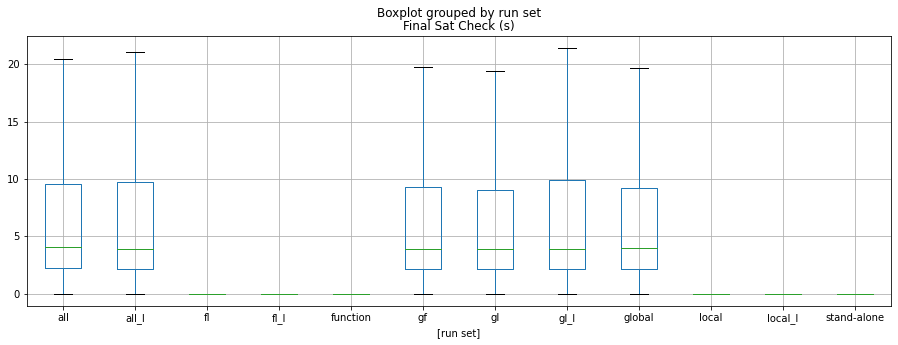

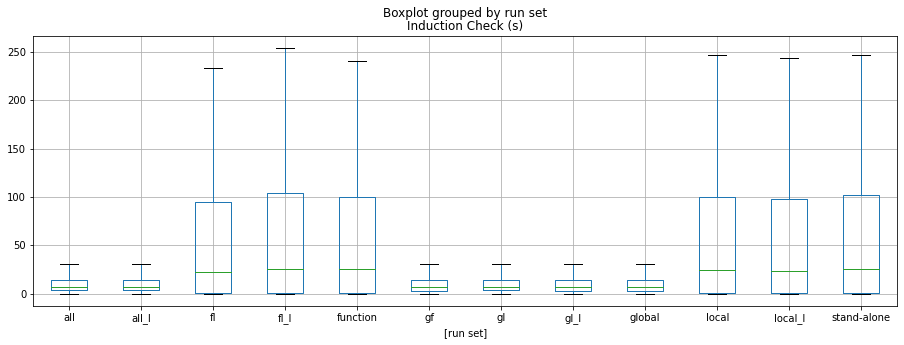

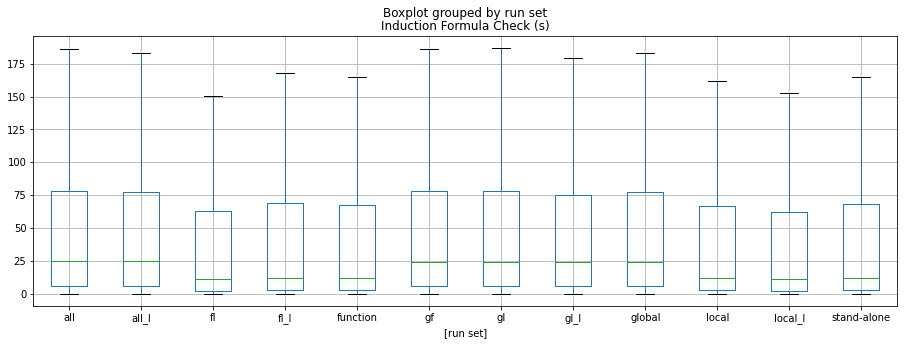

In [114]:
#print all standard box plots

for category in csv.columns:
    if(category == "Status" or category == "driver" or category == "run set"):
        continue
    
    print(category)
    csv.boxplot(category,by=['run set'],figsize=(15,5),showfliers=False).get_figure().savefig("boxplots/singleInvs/"+category.replace(" ", "")+".pdf")

In [ ]:
#get speedup values. One column at a time. You need to change the specified column
column = "CPU Time (s)"

cpu_times_temp = csv[["driver","run set",column]]

cpu_times = cpu_times_temp.pivot(columns="run set",index="driver",values=column)
cpu_times

In [ ]:
#calculate speedup. run set order needs to be: Pred, Value, kInd, kIndRe, predRe, valueRe
speedups = cpu_times.copy()
columnsList = list(speedups.columns)
for i,driver in enumerate(speedups.index):
    #base = speedups["stand-alone"][driver]
    for j,col in enumerate(speedups.columns):
        #speedups[col][i] = base / speedups[col][i]
        if j >= 3:
            continue
        if j < 2:    
            speedups[col][i] = speedups[col][i]/ speedups[columnsList[j+4]][i]
        if j == 2:    
            speedups[col][i] = speedups[col][i]/ speedups[columnsList[j+1]][i]
speedups

In [ ]:
#generate box plot and save it. You need to change the file name accordingly

output = speedups.copy()

output = output.drop(columns=['kIndRe', 'predRe', 'valueRe'])
axes = output.boxplot(figsize=(5,5),showfliers=False, return_type='axes')

plt.ylim(0.6, 1.6)  
    
plt.savefig("differentAnalyses/r4speedupCPU.pdf")